  <style>
    .container {
      display: flex;
      justify-content: space-between;
      align-items: center;
    }

    .text {
      width: 95%;
       text-align: center;
    }

    .image {
      width: 5%;
      text-align: center; 
    }

    
    .image img {
      max-width: 100%;
      height: auto;
    }
  </style> 
  
  <div class="container">
    <div class="image">
      <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Logo_KIT.svg/1200px-Logo_KIT.svg.png" width=100 height=50/>
    </div>
        <div class="text">
      <h1> Medical Image Processing and Navigation 2024/25</h1>
    </div>
  </div>

---

<center>
<h2>Medical Image Processing</h2> 
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSMyuSDBLJILqpD1O1Z5XE8EKC5VJ0eoHB3S_0GyLFG_umpP0U6NBi_mTQQrW2xyAClYag&usqp=CAU"/>


---

<center>
Lecturer: <b><i>Ciro Benito Raggio</i></b> 
<br/>
<a><href>https://www.ibt.kit.edu/english/Raggio_C.php</href></a>

# Basic image manipulation with SimpleITK

## Crop

In [1]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

ct_path='assets/PythonBasicsLecture/data/img0001.nii.gz'
ct_label_path='assets/PythonBasicsLecture/data/label0001.nii.gz'

# CT
ct_sitk  = sitk.ReadImage(ct_path, sitk.sitkFloat32) # Reading CT
ct_array = sitk.GetArrayFromImage(ct_sitk) # Converting sitk_metadata to image array

# Label
label_sitk = sitk.ReadImage(ct_label_path,sitk.sitkInt32) # Reading label
label_array = sitk.GetArrayFromImage(label_sitk) 

print(f'Original CT shape {ct_array.shape}, Original CT Label shape {label_array.shape}')

Original CT shape (147, 512, 512), Original CT Label shape (147, 512, 512)


Shape before crop (147, 512, 512)
Shape after crop (147, 512, 512)


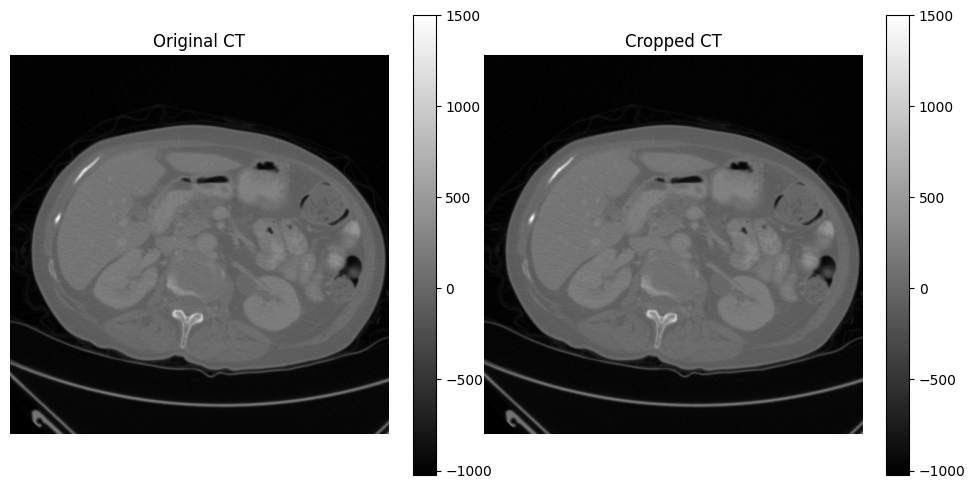

In [10]:
slice_number=100
# Cropping takes the orientation of the pixels for the reference of lower & upper boundaries vectors
# Pixel orientation = RPS = (left-to-Right, anterior-to-Posterior, inferior-to-Superior)

# crop 40 from inferior to superior, crop 50 from superior to inferior
#                                     X,Y,Z 
cropped_ct_sitk = sitk.Crop(ct_sitk, (0,0,0)) 
cropped_ct_array = sitk.GetArrayFromImage(cropped_ct_sitk)

print(f'Shape before crop {sitk.GetArrayFromImage(ct_sitk).shape}\nShape after crop {cropped_ct_array.shape}')

f, axarr = plt.subplots(1, 2, figsize=(10,5))

img = axarr[0].imshow(np.squeeze(ct_array[slice_number, :, :]), cmap='gray',origin='lower')
axarr[0].axis('off')
axarr[0].set_title('Original CT')
f.colorbar(img, ax=axarr[0])

img = axarr[1].imshow(np.squeeze(cropped_ct_array[slice_number, :, :]), cmap='gray', origin='lower')
axarr[1].axis('off')
axarr[1].set_title('Cropped CT')
f.colorbar(img, ax=axarr[1])
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

## Padding
Padding is used to create space around an element's content, inside of any defined borders

Current constant: -1024
Shape before pad (147, 512, 512)
Shape after pad (147, 677, 592)


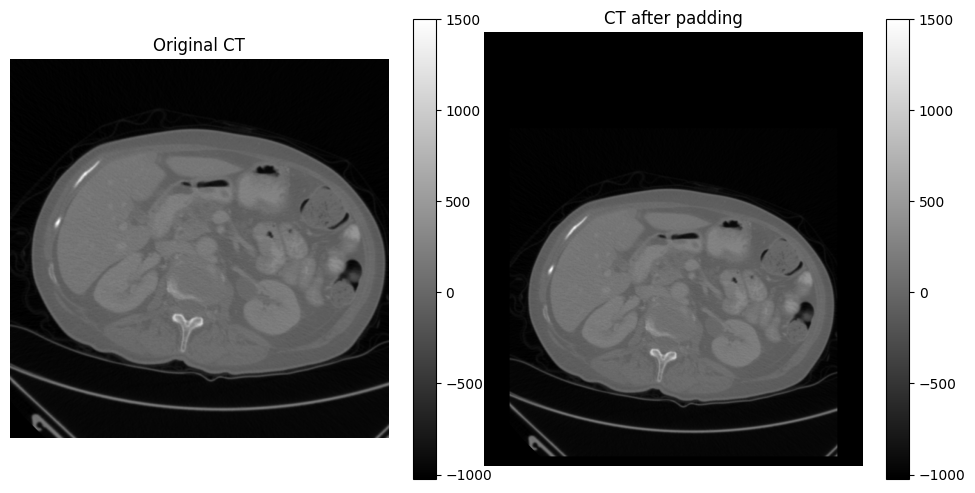

In [3]:
# Find the desired intensity for the edges, equivalent to the minimum value present in the CT
constant = int(sitk.GetArrayFromImage(ct_sitk).min())
print(f"Current constant: {constant}")

# Padding (as Cropping) takes the orientation of the pixels for the reference of lower & upper boundaries vectors
# Pixel orientation = RPS = (left-to-Right, anterior-to-Posterior, inferior-to-Superior)

# pad 40 from left to right, pad 15 from anterior to posterior, 
# pad 40x from right to left, pad 8 from posterior to anterior. 
transformed = sitk.ConstantPad(ct_sitk,(40,15,0),(40,150,0),constant)
pad_ct_array = sitk.GetArrayFromImage(transformed)

print(f'Shape before pad {sitk.GetArrayFromImage(ct_sitk).shape}\nShape after pad {pad_ct_array.shape}')

f, axarr = plt.subplots(1, 2, figsize=(10,5))

img = axarr[0].imshow(np.squeeze(ct_array[100, :, :]), cmap='gray',origin='lower')
axarr[0].axis('off')
axarr[0].set_title('Original CT')
f.colorbar(img, ax=axarr[0])

img = axarr[1].imshow(np.squeeze(pad_ct_array[slice_number, :, :]), cmap='gray', origin='lower')
axarr[1].axis('off')
axarr[1].set_title('CT after padding')
f.colorbar(img, ax=axarr[1])
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

## Normalization and Masking

## Normalization
$$
X_{new} = \frac{X - X_{min}}{X_{max} - X_{min}}


Original ct min -1024.0 max 2639.0
Normalized ct min 0.0 max 1.0


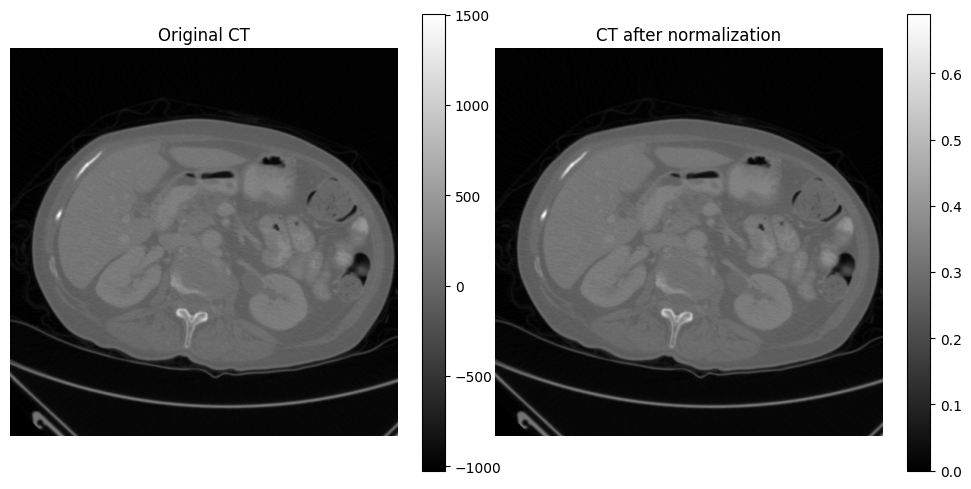

In [4]:
normalized_ct = (ct_array-np.min(ct_array))/(np.max(ct_array) - np.min(ct_array))

print(f"Original ct min {np.min(ct_array)} max {np.max(ct_array)}")
print(f"Normalized ct min {np.min(normalized_ct)} max {np.max(normalized_ct)}")

f, axarr = plt.subplots(1, 2, figsize=(10,5))

img = axarr[0].imshow(np.squeeze(ct_array[slice_number, :, :]), cmap='gray', origin='lower')
axarr[0].axis('off')
axarr[0].set_title('Original CT')
f.colorbar(img, ax=axarr[0])

img = axarr[1].imshow(np.squeeze(normalized_ct[slice_number, :, :]), cmap='gray', origin='lower')
axarr[1].axis('off')
axarr[1].set_title('CT after normalization')
f.colorbar(img, ax=axarr[1])

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

⚠️ In this case, however, let's remember that the CT follows a very precise scale (HU) so normalizing the values ​​between 0 and 1 is not always a good choice. ⚠️

## Masking
The most basic way is to use a fixed threshold to mask parts of the CT

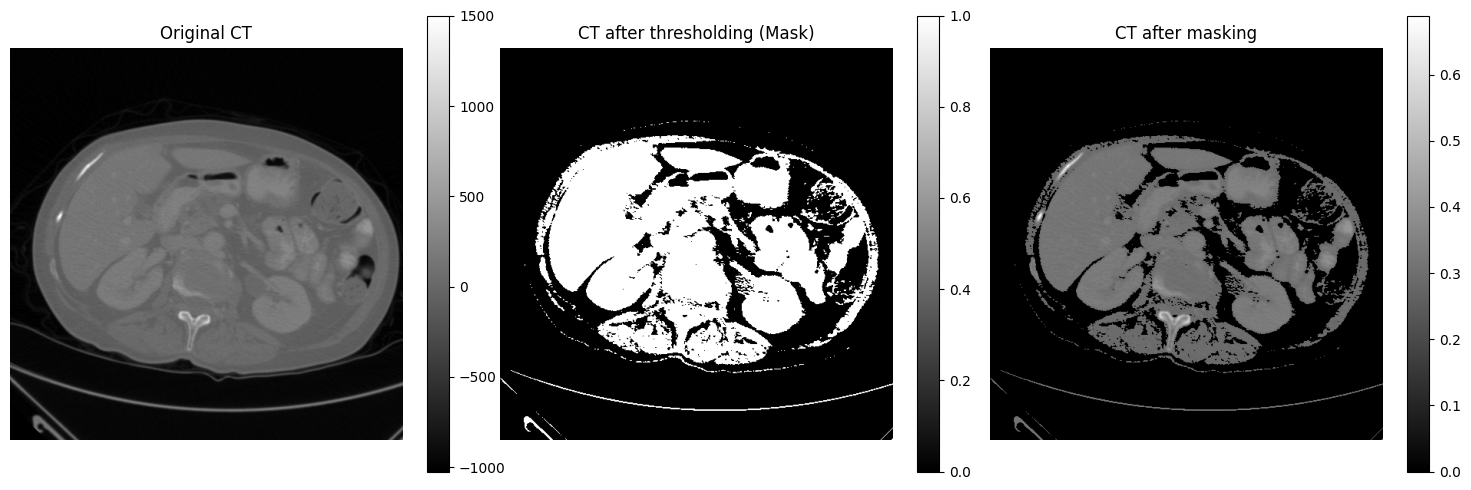

In [5]:
mask = ct_array >= 0

mask_sitk = sitk.GetImageFromArray(mask.astype(float))
ct_mask_array = sitk.GetArrayFromImage(mask_sitk)

masked_ct = normalized_ct * ct_mask_array

f, axarr = plt.subplots(1, 3, figsize=(15,5))

img = axarr[0].imshow(np.squeeze(ct_array[slice_number, :, :]), cmap='gray',origin='lower')
axarr[0].axis('off')
axarr[0].set_title('Original CT')
f.colorbar(img, ax=axarr[0])

img = axarr[1].imshow(np.squeeze(ct_mask_array[slice_number, :, :]), cmap='gray', origin='lower')
axarr[1].axis('off')
axarr[1].set_title('CT after thresholding (Mask)')
f.colorbar(img, ax=axarr[1])


img = axarr[2].imshow(np.squeeze(masked_ct[slice_number, :, :]), cmap='gray', origin='lower')
axarr[2].axis('off')
axarr[2].set_title('CT after masking')
f.colorbar(img, ax=axarr[2])

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

# Exercise 📖 

# Write a general function to apply pre-processing, letting the user choose which part of the pipeline to apply and which parameters to use.

Shape of ct_array: (147, 512, 512)
Shape of extracted 2D slice: (512, 512)
Shape before crop: (512, 512)
Shape after crop: (492, 492)
Current constant: -1024
Shape before pad: (492, 492)
Shape after pad: (502, 502)


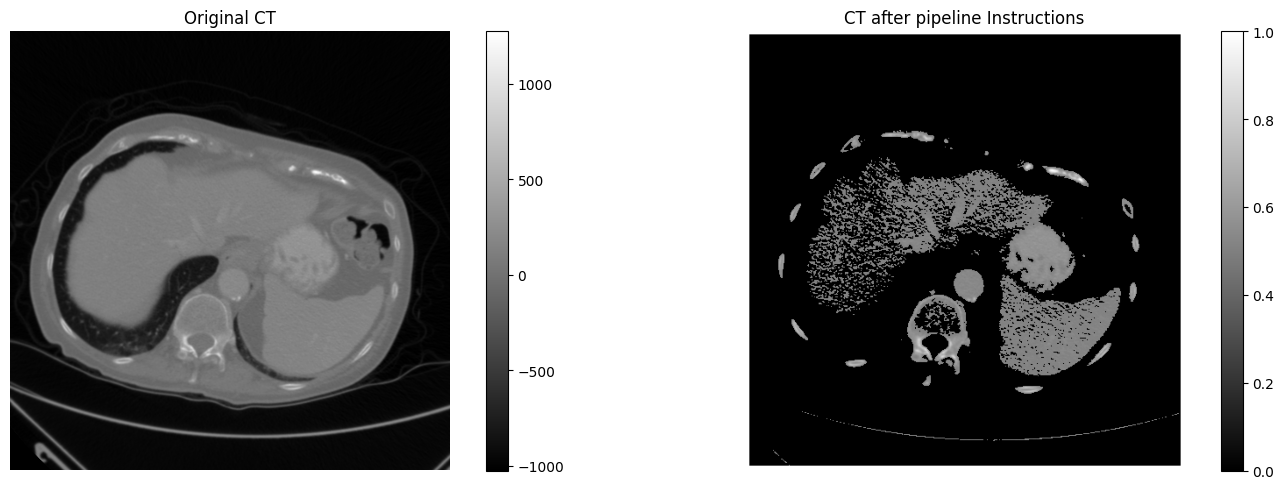

In [ ]:
import SimpleITK as sitk

def preprocessVolume(image: sitk.Image, 
                     pipelineInstructions: dict = {
                        "crop": {
                           "enable": False,
                           "axis": (0,0,0)
                           },
                        "pad": {
                           "enable": False,
                           "mode": "constant",
                           "const": 0,
                           "lower_bound": [0,0,0], 
                           "upper_bound": [0,0,0]
                           },
                        "normalize": {
                           "enable": False,
                           "lower_value": 0,
                           "upper_value": 1
                           },   
                        "mask": {
                           "enable": False,
                           "threshold": 0
                           },
                     }
                  ) -> sitk.Image:

   #1: CROP
   '''
   if 'crop' is not part of the dict return empty dict {} / if enable within crop is misssing then skip 
   This retrieves the axis value within the "crop" dictionary, specifying the number of pixels to crop from each axis (x, y, z)
	If the "axis" key is not present, it will default to (0,0,0), meaning no cropping
   '''
   if pipelineInstructions.get("crop",{}).get("enable", False):
      crop_axis = pipelineInstructions["crop"].get("axis", (0,0,0))
      print(f'Shape before crop: {sitk.GetArrayFromImage(image).shape}')
      image = sitk.Crop(image, crop_axis, crop_axis)
      print(f'Shape after crop: {sitk.GetArrayFromImage(image).shape}')


   #2: PAD
   '''
   if 'pad' is not part of the dict return empty dict {} / if enable within pad is misssing then skip 
   '''
   if pipelineInstructions.get("pad", {}).get("enable", False):
      pad_mode = pipelineInstructions["pad"].get("mode", constant)
      #pad_const = pipelineInstructions["pad"].get("const", 0)
      lower_bound = pipelineInstructions["pad"].get("lower_bound", [0,0,0])
      upper_bound = pipelineInstructions["pad"].get("upper_bound", [0,0,0])

      #find the lowest intensity values and use for padding 
      pad_constant = int(sitk.GetArrayFromImage(image).min())
      print(f"Current constant: {constant}")

      print(f'Shape before pad: {sitk.GetArrayFromImage(image).shape}')
      # Apply padding
      if pad_mode == "constant":
         image = sitk.ConstantPad(image, lower_bound, upper_bound, pad_constant)
      print(f'Shape after pad: {sitk.GetArrayFromImage(image).shape}')


   #3: NORMALIZATION
   '''
   if 'normalize' is not part of the dict return empty dict {} / if enable within normalize is misssing then skip 
   '''   
   if pipelineInstructions.get("normalize", {}).get("enable", False):
      lower_value = pipelineInstructions["normalize"].get("lower_value", 0)
      upper_value = pipelineInstructions["normalize"].get("upper_value", 1)
      image = sitk.RescaleIntensity(image, lower_value, upper_value)


   #4: MASKING
   '''
   if 'maks' is not part of the dict return empty dict {} / if enable within mask is misssing then skip 
   '''
   if pipelineInstructions.get("mask", {}).get("enable", False):
        threshold = pipelineInstructions["mask"].get("threshold", 0)
        image = sitk.Mask(image, sitk.Greater(image, threshold))
    

   return image



############################################################## apply the result ###################################################################################

# Assuming ct_array is a 3D numpy array representing a CT volume
# Check the shape of the volume
print(f"Shape of ct_array: {ct_array.shape}")  # Should be (depth, height, width)

# Define the slice index and ensure it's within bounds
slice_index = 130  # Adjust according to the depth of ct_array

# Extract a 2D slice and convert it to a SimpleITK image
slice_2d_array = ct_array[slice_index, :, :]
print(f"Shape of extracted 2D slice: {slice_2d_array.shape}")  # Should be (height, width)
image = sitk.GetImageFromArray(slice_2d_array)


# Define pipeline instructions
pipelineInstructions = {
    "crop": {
        "enable": True,
        "axis": (10, 10, 10)  # Crop 10 pixels from each side
    },
    "pad": {
        "enable": True,
        "mode": "constant",
        "lower_bound": [5, 5, 5],  # Add 5 pixels of padding on the lower bounds
        "upper_bound": [5, 5, 5]   # Add 5 pixels of padding on the upper bounds
    },
    "normalize": {
        "enable": True,
        "lower_value": 0,
        "upper_value": 1
    },
    "mask": {
        "enable": True,
        "threshold": 0.5
    }
}

#apply the pipeline
preprocessed_image = preprocessVolume(image, pipelineInstructions)

#original & preprocessed image 
original_img_np = sitk.GetArrayFromImage(image)
preprocessed_image_np = sitk.GetArrayFromImage(preprocessed_image)


#show the plots 
f, axarr = plt.subplots(1, 2, figsize=(15,5))

img = axarr[0].imshow(original_img_np, cmap='gray',origin='lower')
axarr[0].axis('off')
axarr[0].set_title('Original CT')
f.colorbar(img, ax=axarr[0])

img = axarr[1].imshow(preprocessed_image_np, cmap='gray', origin='lower')
axarr[1].axis('off')
axarr[1].set_title('CT after pipeline Instructions')
f.colorbar(img, ax=axarr[1])

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)



## To complete the exercise, you will need to pass each of the unit tests.

In [7]:
import unittest
import SimpleITK as sitk

class TestPreprocessVolume(unittest.TestCase):
    
    def setUp(self):
        self.image = sitk.ReadImage('assets/data/img0001.nii.gz', sitk.sitkFloat32)

    def test_crop_enabled(self):
        pipelineInstructions = {
            "crop": {"enable": True, "axis": (4, 4, 4)},
            "pad": {"enable": False},
            "normalize": {"enable": False},
            "mask": {"enable": False}
        }
        result = preprocessVolume(self.image, pipelineInstructions)
        self.assertEqual(result.GetSize(), (510, 510, 145))

    def test_pad_enabled(self):
        pipelineInstructions = {
            "crop": {"enable": False},
            "pad": {"enable": True, "mode": "constant", "const": -1000, "lower_bound": [1, 1, 1], "upper_bound": [1, 1, 1]},
            "normalize": {"enable": False},
            "mask": {"enable": False}
        }
        result = preprocessVolume(self.image, pipelineInstructions)
        self.assertEqual(result.GetSize(), (514, 514, 149)) 
        self.assertEqual(sitk.GetArrayFromImage(result)[0, 0, 0], -1000) # padding should be -1000
        
    def test_normalize_enabled(self):
        lower = 0
        upper = 1
        pipelineInstructions = {
            "crop": {"enable": False},
            "pad": {"enable": False},
            "normalize": {"enable": True, "lower_value": lower, "upper_value": upper},
            "mask": {"enable": False}
        }
        result = preprocessVolume(self.image, pipelineInstructions)
        array = sitk.GetArrayFromImage(result)
        self.assertAlmostEqual(np.min(array), lower)
        self.assertAlmostEqual(np.max(array), upper)

    def test_mask_enabled(self):
        pipelineInstructions = {
            "crop": {"enable": False},
            "pad": {"enable": False},
            "normalize": {"enable": False},
            "mask": {"enable": True, "threshold": -2000}
        }
        result = preprocessVolume(self.image, pipelineInstructions)
        array = sitk.GetArrayFromImage(result)
        self.assertTrue((array == 1.0).all())  # All values ​​should be 1 as -2000 is greater than the lowest value in the CT
    
unittest.main(argv=[''], exit=False)

EEEE
ERROR: test_crop_enabled (__main__.TestPreprocessVolume.test_crop_enabled)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/var/folders/bx/0qbxjk311l11ppvx938yczlc0000gn/T/ipykernel_23485/795085615.py", line 7, in setUp
    self.image = sitk.ReadImage('assets/data/img0001.nii.gz', sitk.sitkFloat32)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/SimpleITK/extra.py", line 384, in ReadImage
    return reader.Execute()
           ^^^^^^^^^^^^^^^^
  File "/Users/jonasludwig/Desktop/MIPGN/venv/lib/python3.12/site-packages/SimpleITK/SimpleITK.py", line 8502, in Execute
    return _SimpleITK.ImageFileReader_Execute(self)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: /tmp/SimpleITK/Code/IO/src/sitkImageReaderBase.cxx:91:
sitk::ERROR: The file "a

# References
[fitushar - Medical Imaging Preprocessing](https://github.com/fitushar/3D-Medical-Imaging-Preprocessing-All-you-need/blob/master/Code/3DMedical-Imaging-Preprocessing-All-you-need.ipynb)

[Angeluz-07 - Common operations](https://github.com/Angeluz-07/MRI-preprocessing-techniques/blob/main/notebooks/02_common_operations.ipynb)